In [1]:
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.models import load_model
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

In [2]:
# For reading stock data from yahoo
from pandas_datareader.data import DataReader
# For time stamps
from datetime import datetime

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [3]:
# To Obtain CSV
df=pd.read_csv("APPL_2018_2021.csv")
# Show teh data
df.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,42.540001,43.075001,42.314999,43.064999,41.310070,102223600
1,2018-01-03,43.132500,43.637501,42.990002,43.057499,41.302879,118071600
2,2018-01-04,43.134998,43.367500,43.020000,43.257500,41.494736,89738400


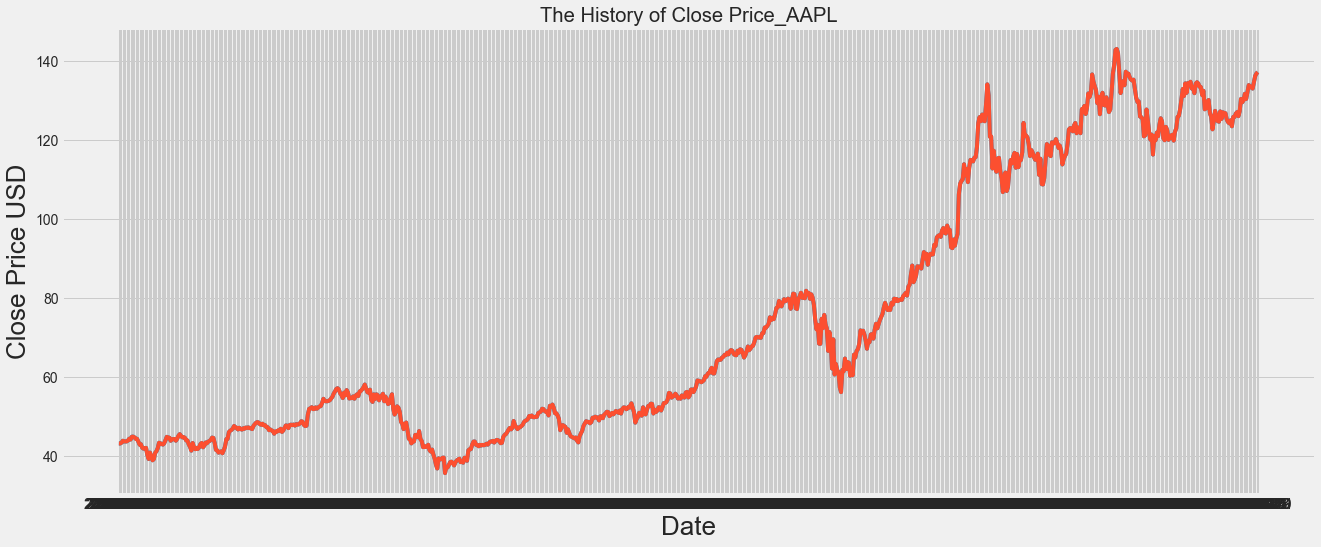

In [4]:
# # To change the format of Date in Python
#dates = mdates.date2num(df['Date'])
dates = df['Date']
plt.figure(figsize=(20,8))
plt.title('The History of Close Price_AAPL')

closePrice = df['Close']
plt.plot_date(dates, closePrice,linestyle='solid', marker=None)
plt.plot(dates, closePrice)
plt.xlabel('Date', fontsize=26)
plt.ylabel('Close Price USD', fontsize=26)
plt.show()

In [5]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

print(training_data_len)

837


In [6]:
print(len(data))

881


In [7]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

print(scaled_data.shape)
print(scaled_data[:3])

(881, 1)
[[0.06985711]
 [0.06978741]
 [0.07164594]]


In [8]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.06985711, 0.06978741, 0.07164594, 0.07622255, 0.07471252,
       0.07466604, 0.07457309, 0.07687303, 0.08107792, 0.0789871 ,
       0.08574748, 0.08611916, 0.08426066, 0.08086885, 0.08096175,
       0.07441049, 0.06718549, 0.06811474, 0.05986759, 0.05756765,
       0.05863628, 0.0594494 , 0.04253687, 0.03322105, 0.04841444,
       0.04030663, 0.030108  , 0.03303519, 0.04767105, 0.05145776,
       0.0584969 , 0.07155302, 0.07025203, 0.06890464, 0.06709258,
       0.07041467, 0.07738412, 0.08544545, 0.08409803, 0.08347077,
       0.07622255, 0.07903358, 0.0804507 , 0.08010221, 0.07629224,
       0.08072947, 0.08779182, 0.09183412, 0.0877686 , 0.08421419,
       0.08470203, 0.08323847, 0.0769195 , 0.07678011, 0.06755721,
       0.06193519, 0.05285167, 0.07104193, 0.06075036, 0.0564293 ])]
[0.059449402454657185]

[array([0.06985711, 0.06978741, 0.07164594, 0.07622255, 0.07471252,
       0.07466604, 0.07457309, 0.07687303, 0.08107792, 0.0789871 ,
       0.08574748, 0.08611916, 0.0

In [9]:
x_train.shape

(777, 60, 1)

In [10]:
# Create the testing data set
# Create a new array containing scaled values (previous 60 days)
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# To Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))
print (x_test.shape[0],x_test.shape[1],1)

44 60 1


In [11]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=10, epochs=20)
model.save('my_AAPL.h5')

In [12]:
###　Linear Regression
from sklearn.linear_model import LinearRegression

In [13]:
### MULTIPLE LR
lr_model = LinearRegression()

#better
#Fit(): Method calculates the parameters μ and σ and saves them as internal objects.
#Linear regression model是用sck-kit learn 實作的
#shape就是 (row數，column數)
#column數是60(看前60天的資料)


lr_model.fit(x_train.reshape(x_train.shape[0], x_train.shape[1], ), y_train.reshape(-1))

LinearRegression()

In [14]:
x_train.reshape(x_train.shape[0], x_train.shape[1], ), y_train.reshape(-1)

(array([[0.06985711, 0.06978741, 0.07164594, ..., 0.07104193, 0.06075036,
         0.0564293 ],
        [0.06978741, 0.07164594, 0.07622255, ..., 0.06075036, 0.0564293 ,
         0.0594494 ],
        [0.07164594, 0.07622255, 0.07471252, ..., 0.0564293 , 0.0594494 ,
         0.05689392],
        ...,
        [0.8959229 , 0.9161807 , 0.92407946, ..., 0.895737  , 0.91785344,
         0.92157042],
        [0.9161807 , 0.92407946, 0.9143222 , ..., 0.91785344, 0.92157042,
         0.91850385],
        [0.92407946, 0.9143222 , 0.94638165, ..., 0.92157042, 0.91850385,
         0.91097687]]),
 array([0.0594494 , 0.05689392, 0.06086652, 0.06834707, 0.07111163,
        0.0608433 , 0.06472296, 0.07215703, 0.07027529, 0.07422464,
        0.07559529, 0.07812755, 0.08374956, 0.08282028, 0.07111163,
        0.05466371, 0.05354861, 0.04820537, 0.04985477, 0.05117899,
        0.04676502, 0.05359505, 0.06251598, 0.07986991, 0.0806133 ,
        0.09673596, 0.09982576, 0.10189336, 0.10493668, 0.11116271,
 

In [15]:
x_train.shape[0]

777

In [16]:
x_train.shape[1]

60

In [17]:
### data for Simple LR
x_train_2 = np.arange(len(train_data)).reshape(-1, 1)
y_train_2 = dataset[0:int(training_data_len)].reshape(-1)

x_test_2 = np.arange(838, 838+len(y_test)).reshape(-1,1)
y_test_2 = dataset[int(training_data_len):].reshape(-1)
print(x_train_2.shape, y_train_2.shape)
print(x_test_2.shape, y_test_2.shape)### Linear Regression Model2
lr_model_2 = LinearRegression()

lr_model_2.fit(x_train_2, y_train_2)

(837, 1) (837,)
(44, 1) (44,)


LinearRegression()

In [18]:
x_test_2

array([[838],
       [839],
       [840],
       [841],
       [842],
       [843],
       [844],
       [845],
       [846],
       [847],
       [848],
       [849],
       [850],
       [851],
       [852],
       [853],
       [854],
       [855],
       [856],
       [857],
       [858],
       [859],
       [860],
       [861],
       [862],
       [863],
       [864],
       [865],
       [866],
       [867],
       [868],
       [869],
       [870],
       [871],
       [872],
       [873],
       [874],
       [875],
       [876],
       [877],
       [878],
       [879],
       [880],
       [881]])

In [19]:
y_train_2

array([ 43.064999,  43.057499,  43.2575  ,  43.75    ,  43.587502,
        43.5825  ,  43.572498,  43.82    ,  44.272499,  44.047501,
        44.775002,  44.814999,  44.615002,  44.25    ,  44.259998,
        43.555   ,  42.7775  ,  42.877499,  41.990002,  41.7425  ,
        41.857498,  41.945   ,  40.125   ,  39.122501,  40.7575  ,
        39.884998,  38.787498,  39.102501,  40.677502,  41.084999,
        41.842499,  43.247501,  43.107498,  42.962502,  42.767502,
        43.125   ,  43.875   ,  44.7425  ,  44.5975  ,  44.529999,
        43.75    ,  44.052502,  44.205002,  44.1675  ,  43.7575  ,
        44.235001,  44.994999,  45.43    ,  44.9925  ,  44.610001,
        44.662498,  44.505001,  43.825001,  43.810001,  42.817501,
        42.212502,  41.235001,  43.192501,  42.084999,  41.619999,
        41.945   ,  41.669998,  42.0975  ,  42.9025  ,  43.200001,
        42.095001,  42.512501,  43.3125  ,  43.110001,  43.535   ,
        43.682499,  43.955002,  44.560001,  44.459999,  43.200

In [20]:
# the models predicted price values 

model = load_model('my_AAPL.h5')
#X1=scaler.inverse_transform(X_scaled) is to transform the standardized data into the original data.
''' LSTM'''
predictions = model.predict(x_test)
predictions_origin_scale = scaler.inverse_transform(predictions)

#X1=scaler.inverse_transform(X_scaled) is to transform the standardized data into the original data.
'''Alternative_Linear Regression'''
lr_predictions = lr_model.predict(x_test.reshape(x_test.shape[0], x_test.shape[1],))
lr_predictions_origin_scale = scaler.inverse_transform(np.expand_dims(lr_predictions, -1))

''' Simple_Linear Regression 2 '''
lr_predictions_2 = lr_model_2.predict(x_test_2)

In [21]:
x_test_2

array([[838],
       [839],
       [840],
       [841],
       [842],
       [843],
       [844],
       [845],
       [846],
       [847],
       [848],
       [849],
       [850],
       [851],
       [852],
       [853],
       [854],
       [855],
       [856],
       [857],
       [858],
       [859],
       [860],
       [861],
       [862],
       [863],
       [864],
       [865],
       [866],
       [867],
       [868],
       [869],
       [870],
       [871],
       [872],
       [873],
       [874],
       [875],
       [876],
       [877],
       [878],
       [879],
       [880],
       [881]])

In [22]:
x_test.shape[0]

44

In [23]:
 x_test.shape[1]

60

<ipython-input-24-03fc8f08b8a0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['LSTM_Predictions'] = predictions_origin_scale
<ipython-input-24-03fc8f08b8a0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Multiple_LR_Predictions'] = lr_predictions_origin_scale
<ipython-input-24-03fc8f08b8a0>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

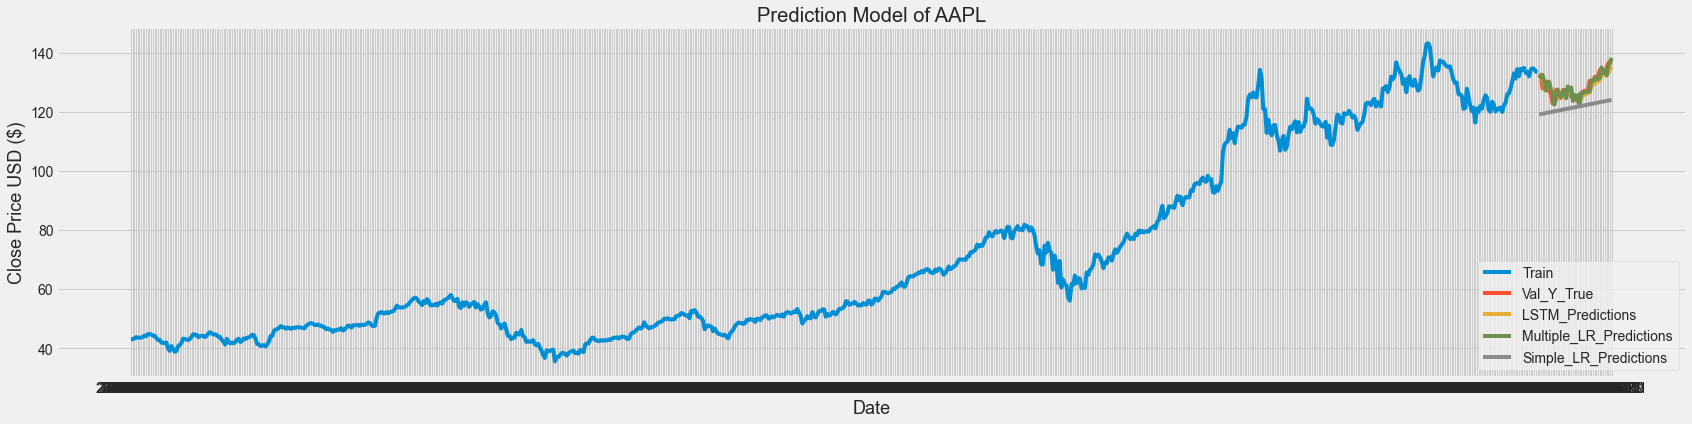

In [24]:
### Plot Training data, testing data and predictions
#training data 
train = data[:training_data_len]

# testing data
valid = data[training_data_len:]
valid['LSTM_Predictions'] = predictions_origin_scale
valid['Multiple_LR_Predictions'] = lr_predictions_origin_scale 
valid['Simple_LR_Predictions'] = lr_predictions_2 
# Visualize the data


plt.figure(figsize=(26,6))
plt.title('Prediction Model of AAPL')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

trainDates = dates[:training_data_len]
validDates = dates[training_data_len:]
plt.plot_date(trainDates, train, linestyle='solid', marker=None)
plt.plot_date(validDates, valid, linestyle='solid', marker=None)


plt.legend(['Train', 'Val_Y_True', 'LSTM_Predictions', 'Multiple_LR_Predictions', 'Simple_LR_Predictions'], loc='lower right')

plt.show()

<ipython-input-25-1c68c4a4c5e1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['LSTM_Predictions'] = predictions_origin_scale
<ipython-input-25-1c68c4a4c5e1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Multiple_LR_Predictions'] = lr_predictions_origin_scale
<ipython-input-25-1c68c4a4c5e1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

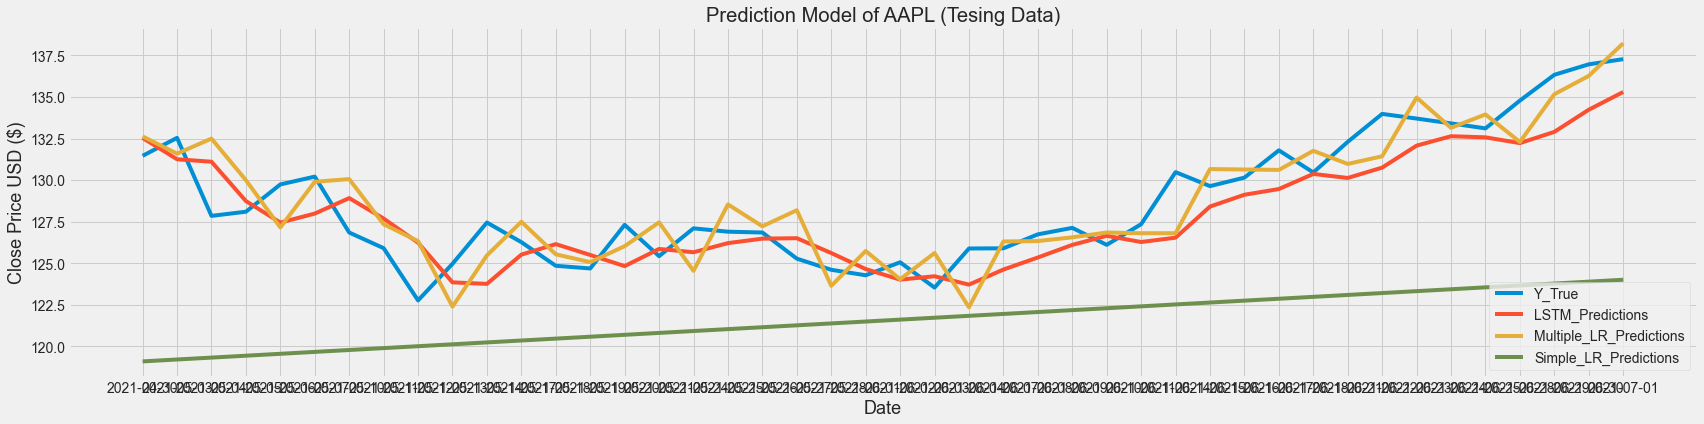

In [25]:
### Plot only Test Data

# testing data
valid = data[training_data_len:]
valid['LSTM_Predictions'] = predictions_origin_scale
valid['Multiple_LR_Predictions'] = lr_predictions_origin_scale 
valid['Simple_LR_Predictions'] = lr_predictions_2 
# Visualize the data


plt.figure(figsize=(26,6))
plt.title('Prediction Model of AAPL (Tesing Data)')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

trainDates = dates[:training_data_len]
validDates = dates[training_data_len:]
#plt.plot_date(trainDates, train, linestyle='solid', marker=None)
plt.plot_date(validDates, valid, linestyle='solid', marker=None)


plt.legend(['Y_True', 'LSTM_Predictions', 'Multiple_LR_Predictions', 'Simple_LR_Predictions'], loc='lower right')

plt.show()



In [26]:
### Evaluate
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_true = y_test
LSTM_mse = mean_squared_error(y_true,predictions_origin_scale)
LSTM_mae =  mean_absolute_error(y_true,predictions_origin_scale)

lr_mse = mean_squared_error(y_true,lr_predictions_origin_scale )
lr_mae = mean_absolute_error(y_true,lr_predictions_origin_scale)

lr_mse_2 = mean_squared_error(y_true,lr_predictions_2 )
lr_mae_2 = mean_absolute_error(y_true,lr_predictions_2)

print('LSTM_MSE: ', LSTM_mse, 'LSTM_MAE: ', LSTM_mae)
print('Multiple_Linear_Regression_MSE: ', lr_mse, 'Multiple_Linear_Regression_MAE: ', lr_mae)
print('Simple_Linear_Regression_MSE: ', lr_mse_2, 'Smple Linear_Regression_MAE: ', lr_mae_2)

LSTM_MSE:  3.5699030597363275 LSTM_MAE:  1.6047717228781948
Multiple_Linear_Regression_MSE:  3.529546794594621 Multiple_Linear_Regression_MAE:  1.5527788538245646
Simple_Linear_Regression_MSE:  61.29848542964575 Smple Linear_Regression_MAE:  7.159047788332623


In [27]:
### Correlation (True vs Predictions)
from scipy import stats 
LSTM_corr, LSTM_p = stats.pearsonr(y_true.reshape(-1), predictions_origin_scale.reshape(-1))
lr_corr, lr_p = stats.pearsonr(y_true.reshape(-1), lr_predictions_origin_scale.reshape(-1))
lr_corr_2, lr_p_2 = stats.pearsonr(y_true.reshape(-1), lr_predictions_2)
print('LSTM_corr:' ,LSTM_corr,'LSTM_p:', LSTM_p)
print('Alternative_corr: ',lr_corr, lr_p)
print('Simpe_corr: ',lr_corr_2, lr_p_2)

LSTM_corr: 0.8910715415337725 LSTM_p: 5.322649055555379e-16
Alternative_corr:  0.8749600993979272 8.196371370610046e-15
Simpe_corr:  0.5791136459052321 3.8133285205425705e-05


In [28]:
# min_True
#真實的第二波修正數字 
# true value in the second corrective wave

min_T = np.min(y_true) 


#WAVE PRINCIPLE

#in the first principle

# March to October the first wave 
max = 116.790001
min = 56.092499

count0382 = max-(max - min) * 0.382
count05 = max-(max - min) * 0.5
count0618 = max-(max - min) * 0.618


#min_LSTM prediction 
min_LSM = np.min(valid['LSTM_Predictions'])
min_MLR = np.min(valid['Multiple_LR_Predictions'])
min_LR = np.min(valid['Simple_LR_Predictions'])

print('ture_min_value_testing data: ',min_T )
print('Min_LSTM predition: ', min_LSM )
print ('Min_Multiple_LR prediction: ',min_MLR)
print ('Min_SLR prediction: ',min_LR)
print ('0.381 second corr wave: ', count0382)
print ('0.5 second corr wave: ', count05)
print ('0.618 second corr wave: ', count0618)



ture_min_value_testing data:  122.769997
Min_LSTM predition:  123.71780395507812
Min_Multiple_LR prediction:  122.35781409420647
Min_SLR prediction:  119.10332704391804
0.381 second corr wave:  93.603555236
0.5 second corr wave:  86.44125
0.618 second corr wave:  79.278944764


In [29]:
#AAPL onclusion 

# Mutiple LR> LSTM > Simple LR > WP(0.318)


In [30]:
# #算第一波 最高和最低  
# # To choose the top one number as the 1st wave
# a = df["Close"].max()
# # 

# #min number 
# b = df["Close"].min()
# b

# #the minus
# c = a - b 

# c

# #0.618 corrective wave

# d = c * 0.618

# d

# e = a - d

# print ('0.618-second wave: ', e)

In [31]:
# #0.5 corrective wave

# f = a - (c * 0.5)

# print('0.5-second wave: ', f)

In [121]:
# #0.382 corrective wave 

# g = a - (c * 0.382)

# g#0.382 corrective wave 

# g = a - (c * 0.382)

# print('o.382-second-wave: ', g)

In [122]:
# #真實的第二波修正數字 
# # true value in the second corrective wave

# min_True = float(min(y_true))
# min_True
# #min_LSTM prediction 
# min_LSM = min(valid['LSTM_Predictions'])
# min_MLR = min(valid['Multiple_LR_Predictions'])
# min_LR = min(valid['Simple_LR_Predictions'])

# print('ture_min_value_in second wave: ',min_True )
# print('Min_LSTM predition: ', min_LSM )
# print ('Min_Multiple_LR prediction: ',min_MLR)
# print ('Min_SLR prediction: ',min_LR)
# print('0.382-second-wave principle: ', g)

In [67]:
#Conclusion

#Based on Wave principle 

#Multiple LR > LSTM > Simple LR > WP

In [68]:
# ####Correlation Plot
# fig, ax = plt.subplots(1,3, figsize=(18*1.8, 4*1.8))

# #### LSTM ####
# x1 = y_true.reshape(-1)
# y1 = predictions_origin_scale.reshape(-1)
# slope, intercept, r, p, stderr = stats.linregress(x1, y1)

# line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
# #print(line)
# ax[0].plot(x1, y1, linewidth=0, marker='s', label='Y_True' + ' v.s.' + 'Y_LSTM_Prediction')
# ax[0].plot(x1, intercept + slope * x1, label=line)
# ax[0].set_xlabel('Y_True')
# ax[0].set_ylabel('Y_LSTM_Prediction')
# ax[0].legend(facecolor='white', loc='best')

# #### Linear Regression 1 ####
# x2 = y_true.reshape(-1)
# y2 = lr_predictions_origin_scale.reshape(-1)
# slope_2, intercept_2, r_2, p_2, stderr_2 = stats.linregress(x2, y2)

# line_2 = f'Regression line: y={intercept_2:.2f}+{slope_2:.2f}x, r={r_2:.2f}'
# #print(line)
# ax[1].plot(x2, y2, linewidth=0, marker='s', label='Y_True' + ' v.s.' + 'Y_Lingear_Regression_Prediction')
# ax[1].plot(x2, intercept_2 + slope_2 * x2, label=line_2)
# ax[1].set_xlabel('Y_True')
# ax[1].set_ylabel('Y_Lingear_Regression_Prediction')
# ax[1].legend(facecolor='white', loc='best')

# #### Linear Regression 2 ####
# x3 = y_true.reshape(-1)
# y3 = lr_predictions_2
# slope_3, intercept_3, r_3, p_3, stderr_3 = stats.linregress(x3, y3)

# line_3 = f'Regression line: y={intercept_3:.2f}+{slope_3:.2f}x, r={r_3:.2f}'
# #print(line)
# ax[2].plot(x3, y3, linewidth=0, marker='s', label='Y_True' + ' v.s.' + 'Y_Lingear_Regression_Prediction_2')
# ax[2].plot(x3, intercept_3 + slope_3 * x3, label=line_3)
# ax[2].set_xlabel('Y_True')
# ax[2].set_ylabel('Y_Lingear_Regression_Prediction_2')
# ax[2].legend(facecolor='white', loc='best')


# plt.show()
